In [8]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load files
city_path = 'data/city_data.csv'
ride_path = 'data/ride_data.csv'

#read files
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

#merge tables
merge_table = ride_data.merge(city_data, on = 'city')

#display
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [9]:
#group data by city
group_city = merge_table.groupby('city').agg({'ride_id':'count','fare':'mean'})
group_city = group_city.merge(city_data,on = 'city')

#display
group_city.head()

,city,ride_id,fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


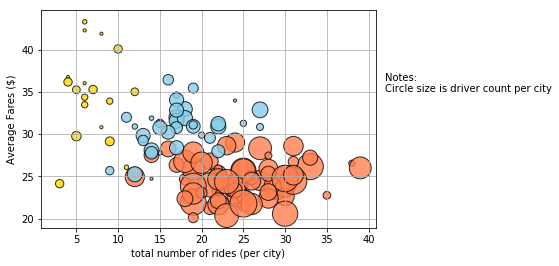

<Figure size 432x288 with 0 Axes>

In [10]:
#urban_cities plot data
urban_cities = group_city.loc[group_city['type']=='Urban']
x_axis_urban = urban_cities['ride_id']
y_axis_urban = urban_cities['fare']
s_axis_urban = urban_cities['driver_count']

#Suburban_cities plot data
suburban_cities = group_city.loc[group_city['type']=='Suburban']
x_axis_suburban = suburban_cities['ride_id']
y_axis_suburban = suburban_cities['fare']
s_axis_suburban = suburban_cities['driver_count']

#Rural_cities plot data
rural_cities = group_city.loc[group_city['type']=='Rural']
x_axis_rural = rural_cities['ride_id']
y_axis_rural = rural_cities['fare']
s_axis_rural = rural_cities['driver_count']

#plot
plt.scatter(x_axis_urban,y_axis_urban,s=10*s_axis_urban,c='coral',edgecolors='black',alpha = 0.8)
plt.scatter(x_axis_suburban,y_axis_suburban,s=10*s_axis_suburban,c='skyblue',edgecolors='black',alpha = 0.8)
plt.scatter(x_axis_rural,y_axis_rural,s=10*s_axis_rural,c='gold',edgecolors='black',alpha = 0.8)

plt.grid(True)
plt.text(42,35, "Notes:\nCircle size is driver count per city")
plt.xlabel('total number of rides (per city)')
plt.ylabel('Average Fares ($)')
#plt.title('Ride sharing data')

#display
plt.show()

# Save Figure
plt.savefig('AvgFare_and_RideCount.png')

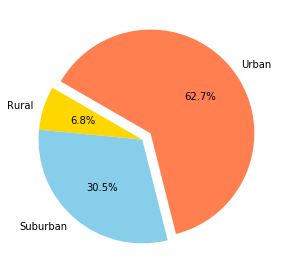

In [11]:
# Total Fares by City Type

# Calculate total_fare Percents
fare_by_cityType = merge_table.groupby('type').agg({'fare':'sum'})

#Build Pie Chart
label = ['Rural','Suburban','Urban']
ride_size = fare_by_cityType['fare']
explode = (0,0,0.1)
color = ['gold','skyblue','coral']

#plot
plt.pie(ride_size, labels = label, colors = color, explode = explode, autopct='%1.1f%%',startangle=150)
#plt.title("of Total Rides by City Type")

#display
plt.tight_layout()

# Save Figure
plt.savefig('TotalFare_by_CityType.png')


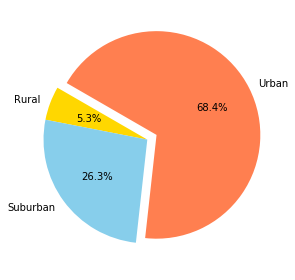

In [12]:
# Total Rides by City Type

# Calculate Type Percents
ride_by_cityType = merge_table.groupby('type').agg({'ride_id':'count'})

#Build Pie Chart
label = ['Rural','Suburban','Urban']
ride_size = ride_by_cityType['ride_id']
explode = (0,0,0.1)
color = ['gold','skyblue','coral']

#plot
plt.pie(ride_size, labels = label, colors = color, explode = explode, autopct='%1.1f%%',startangle=150)
#plt.title("of Total Rides by City Type")

#display
plt.tight_layout()

# Save Figure
plt.savefig('RideCount_by_CityType.png')

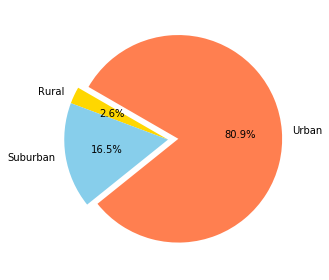

In [13]:
#Total Drivers by City Type

# Calculate driver count Percents
driverCount_by_cityType = group_city.groupby('type').agg({'driver_count':'sum'})

#Build Pie Chart
label = ['Rural','Suburban','Urban']
ride_size = driverCount_by_cityType['driver_count']
explode = (0,0,0.1)
color = ['gold','skyblue','coral']

#plot
plt.pie(ride_size, labels = label, colors = color, explode = explode, autopct='%1.1f%%',startangle=150)
#plt.title("of Total Rides by City Type")

#display
plt.tight_layout()

# Save Figure
plt.savefig('DriverCount_by_CityType.png')